<a href="https://colab.research.google.com/github/ShemaniGawarammana/CVD_Risk_Prediction_ML_with_Flask/blob/main/Copy_of_CardioVascularDieseaseRiskAssesssmentModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular disease risk assessment**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score,recall_score
import tensorflow as tf
import pickle

# **Load dataset**

In [ ]:
cvd_data = pd.read_csv('health_data.csv', index_col = 'id')
cvd_data

,age,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,1,168,62.0,110,80,0,0,0,0,1,0
1,20228,0,156,85.0,140,90,2,0,0,0,1,1
2,18857,0,165,64.0,130,70,2,0,0,0,0,1
3,17623,1,169,82.0,150,100,0,0,0,0,1,1
4,17474,0,156,56.0,100,60,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,1,168,76.0,120,80,0,0,1,0,1,0
99995,22601,0,158,126.0,140,90,1,1,0,0,1,1
99996,19066,1,183,105.0,180,90,2,0,0,1,0,1


In [ ]:
cvd_data.describe()

,age,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,0.349571,164.359229,74.205690,128.817286,96.630414,0.366871,0.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


#**Data Preprocessing**



In [ ]:
cvd_data.isnull().sum()


age             0
gender          0
height          0
weight          0
systolic_BP     0
diastolic_BP    0
cholesterol     0
gluc            0
smoke           0
alco            0
active          0
cardio          0
dtype: int64

In [ ]:
cvd_data.duplicated().sum()

24

In [ ]:
#age into years
cvd_data["age"]=(cvd_data["age"]/365).values.astype(int)
cvd_data.head()

,age,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,1,168,62.0,110,80,0,0,0,0,1,0
1,55,0,156,85.0,140,90,2,0,0,0,1,1
2,51,0,165,64.0,130,70,2,0,0,0,0,1
3,48,1,169,82.0,150,100,0,0,0,0,1,1
4,47,0,156,56.0,100,60,0,0,0,0,0,0


In [ ]:
#height into meteres
cvd_data["height"]=(cvd_data["height"]/100)
cvd_data.head()

,age,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50,1,1.68,62.0,110,80,0,0,0,0,1,0
1,55,0,1.56,85.0,140,90,2,0,0,0,1,1
2,51,0,1.65,64.0,130,70,2,0,0,0,0,1
3,48,1,1.69,82.0,150,100,0,0,0,0,1,1
4,47,0,1.56,56.0,100,60,0,0,0,0,0,0


In [ ]:
#BMI
cvd_data["bmi"]=cvd_data["weight"]/((cvd_data["height"])*(cvd_data["height"]))
cvd_data.head()

,age,gender,height,weight,systolic_BP,diastolic_BP,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
0,50,1,1.68,62.0,110,80,0,0,0,0,1,0,21.967120
1,55,0,1.56,85.0,140,90,2,0,0,0,1,1,34.927679
2,51,0,1.65,64.0,130,70,2,0,0,0,0,1,23.507805
3,48,1,1.69,82.0,150,100,0,0,0,0,1,1,28.710479
4,47,0,1.56,56.0,100,60,0,0,0,0,0,0,23.011177


**Histogram and bell curve**

In [ ]:
bins_value = int(np.sqrt(len(cvd_data)))

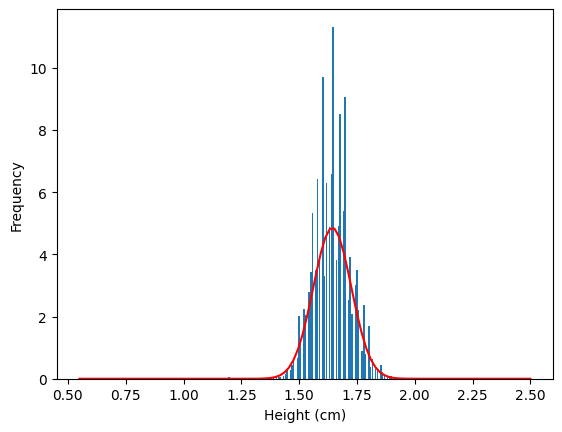

In [ ]:
plt.hist(cvd_data.height, bins = bins_value, rwidth = 0.8,density=True)
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

x_range = np.linspace(cvd_data.height.min(), cvd_data.height.max(), 100)
plt.plot(x_range, norm.pdf(x_range, cvd_data.height.mean(), cvd_data.height.std()), label='Normal Distribution', color='red')
plt.show()

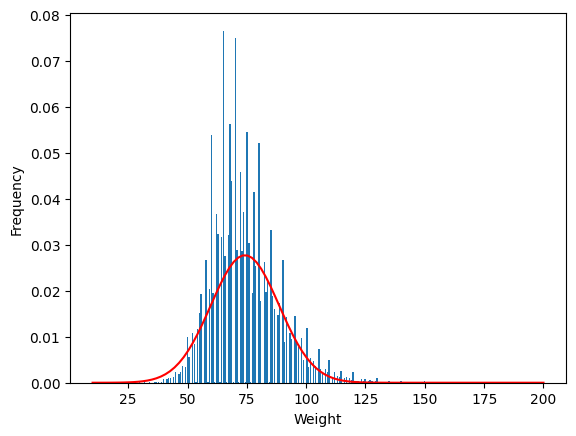

In [ ]:
plt.hist(cvd_data.weight, bins = bins_value, rwidth = 0.8, density=True)
plt.xlabel('Weight')
plt.ylabel('Frequency')

x_range = np.linspace(cvd_data.weight.min(), cvd_data.weight.max(), 100)
plt.plot(x_range, norm.pdf(x_range, cvd_data.weight.mean(), cvd_data.weight.std()), label='Normal Distribution', color='red')

plt.show()

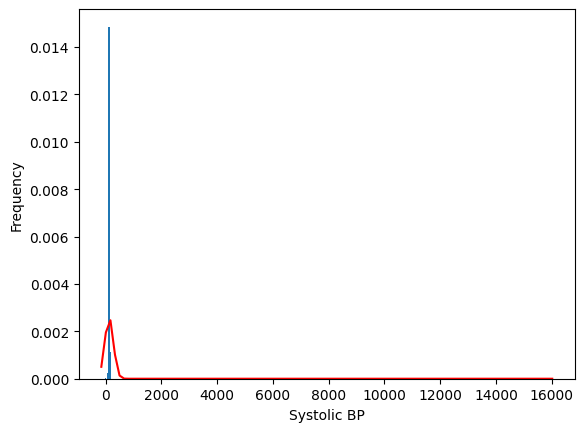

In [ ]:
plt.hist(cvd_data.systolic_BP, bins = bins_value, rwidth = 0.8, density=True)
plt.xlabel('Systolic BP')
plt.ylabel('Frequency')

x_range = np.linspace(cvd_data.systolic_BP.min(), cvd_data.systolic_BP.max(), 100)
plt.plot(x_range, norm.pdf(x_range, cvd_data.systolic_BP.mean(), cvd_data.systolic_BP.std()), label='Normal Distribution', color='red')

plt.show()

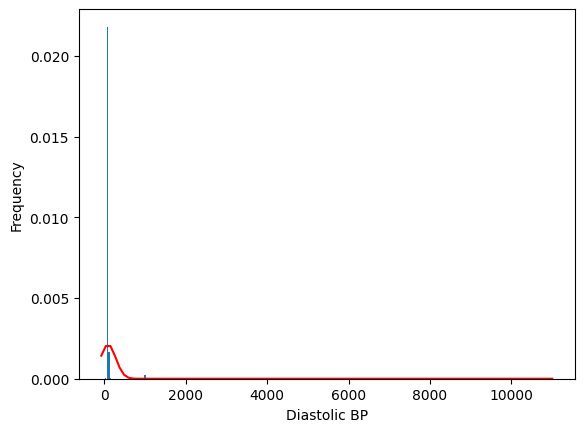

In [ ]:
plt.hist(cvd_data.diastolic_BP, bins = bins_value, rwidth = 0.8, density=True)
plt.xlabel('Diastolic BP')
plt.ylabel('Frequency')

x_range = np.linspace(cvd_data.diastolic_BP.min(), cvd_data.diastolic_BP.max(), 100)
plt.plot(x_range, norm.pdf(x_range, cvd_data.diastolic_BP.mean(), cvd_data.diastolic_BP.std()), label='Normal Distribution', color='red')

plt.show()

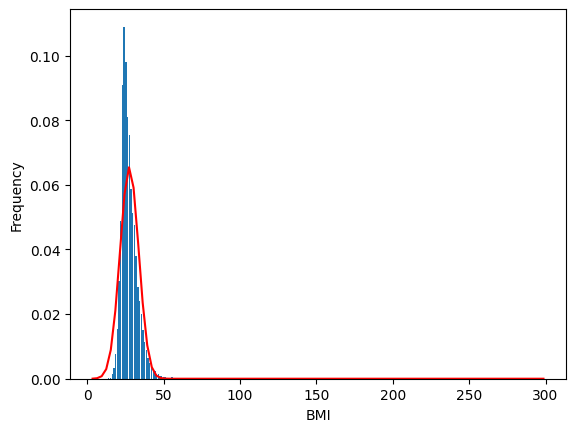

In [ ]:
plt.hist(cvd_data.bmi, bins = bins_value, rwidth = 0.8, density=True)
plt.xlabel('BMI')
plt.ylabel('Frequency')

x_range = np.linspace(cvd_data.bmi.min(), cvd_data.bmi.max(), 100)
plt.plot(x_range, norm.pdf(x_range, cvd_data.bmi.mean(), cvd_data.bmi.std()), label='Normal Distribution', color='red')

plt.show()

**Box Plot and outlier removal**

<Axes: >

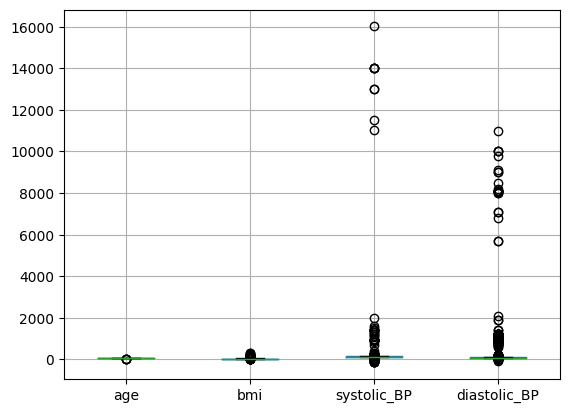

In [ ]:
numeric_data = cvd_data[["age", "bmi", "systolic_BP","diastolic_BP"]]
numeric_data.boxplot()

In [ ]:
Q1 = cvd_data.quantile(0.25)
Q3 = cvd_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the original dataset
cvd_data = cvd_data[
    (cvd_data['age'] >= lower_bound['age']) &
    (cvd_data['age'] <= upper_bound['age']) &
    (cvd_data['height'] >= lower_bound['height']) &
    (cvd_data['height'] <= upper_bound['height']) &
    (cvd_data['weight'] >= lower_bound['weight']) &
    (cvd_data['weight'] <= upper_bound['weight']) &
    (cvd_data['bmi'] >= lower_bound['bmi']) &
    (cvd_data['bmi'] <= upper_bound['bmi']) &
    (cvd_data['systolic_BP'] >= lower_bound['systolic_BP']) &
    (cvd_data['systolic_BP'] <= upper_bound['systolic_BP']) &
    (cvd_data['diastolic_BP'] >= lower_bound['diastolic_BP']) &
    (cvd_data['diastolic_BP'] <= upper_bound['diastolic_BP'])
]

<Axes: >

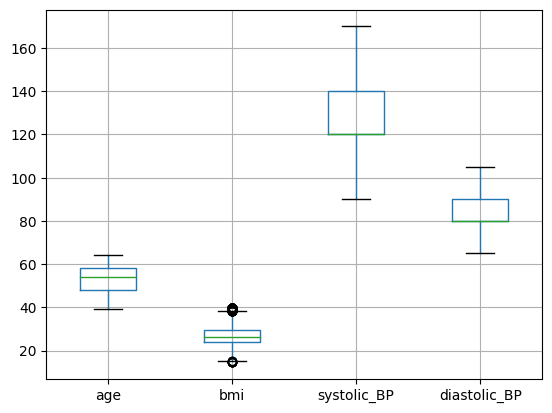

In [ ]:
numeric_data = cvd_data[["age", "bmi", "systolic_BP","diastolic_BP"]]
numeric_data.boxplot()

In [ ]:
cvd_data.shape

(61789, 13)

In [ ]:
cvd_data["cardio"].value_counts()

0    31416
1    30373
Name: cardio, dtype: int64

In [ ]:
cvd_data.corr()["cardio"]

age             0.236389
gender         -0.001506
height         -0.022198
weight          0.157002
systolic_BP     0.432416
diastolic_BP    0.335798
cholesterol     0.217433
gluc            0.085623
smoke          -0.021184
alco           -0.012249
active         -0.036491
cardio          1.000000
bmi             0.175919
Name: cardio, dtype: float64

<Axes: >

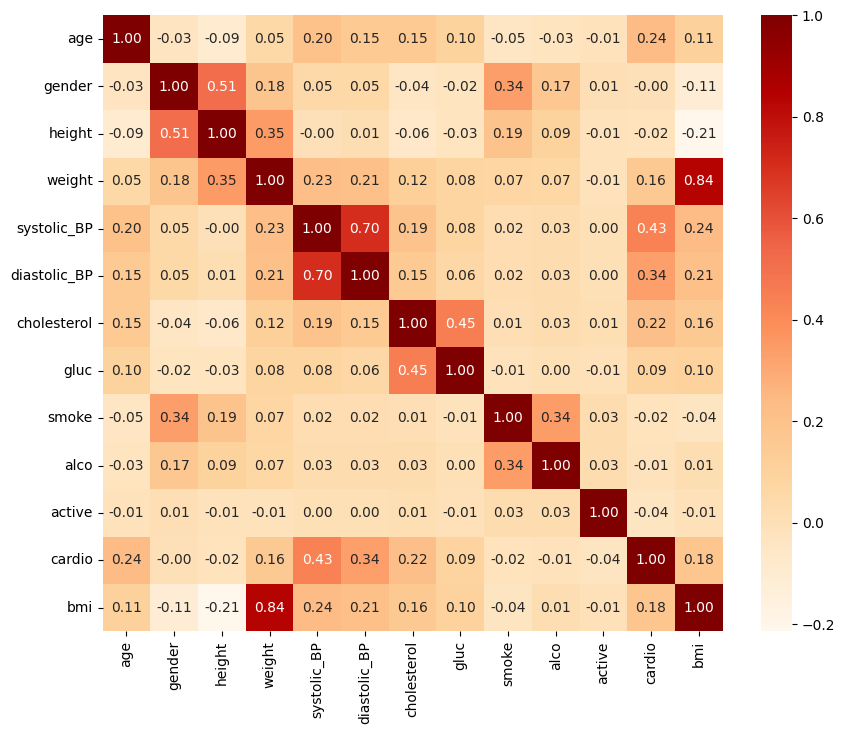

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap((cvd_data.corr()), annot=True, cmap='OrRd', fmt=".2f")

In [ ]:
cvd_data["cholesterol"].value_counts()

0    46801
1     8087
2     6901
Name: cholesterol, dtype: int64

In [ ]:
cvd_data["gluc"].value_counts()

0    52854
2     4613
1     4322
Name: gluc, dtype: int64

In [ ]:
categorical_columns = ["cholesterol",	"gluc"]
cvd_data = pd.get_dummies(cvd_data, columns=categorical_columns)

cvd_data.rename(columns={"cholesterol_0": 'cholesterol_Normal'}, inplace=True)
cvd_data.rename(columns={"cholesterol_1": 'cholesterol_Above_Normal'}, inplace=True)
cvd_data.rename(columns={"cholesterol_2": 'cholesterol_Well_Above_Normal'}, inplace=True)
cvd_data.rename(columns={"gluc_0": 'glucose_Normal'}, inplace=True)
cvd_data.rename(columns={"gluc_1": 'glucose_Above_Normal'}, inplace=True)
cvd_data.rename(columns={"gluc_2": 'glucose_Well_Above_Normal'}, inplace=True)

In [ ]:
cvd_data.head()

,age,gender,height,weight,systolic_BP,diastolic_BP,smoke,alco,active,cardio,bmi,cholesterol_Normal,cholesterol_Above_Normal,cholesterol_Well_Above_Normal,glucose_Normal,glucose_Above_Normal,glucose_Well_Above_Normal
id,,,,,,,,,,,,,,,,,
0,50,1,1.68,62.0,110,80,0,0,1,0,21.967120,1,0,0,1,0,0
1,55,0,1.56,85.0,140,90,0,0,1,1,34.927679,0,0,1,1,0,0
2,51,0,1.65,64.0,130,70,0,0,0,1,23.507805,0,0,1,1,0,0
3,48,1,1.69,82.0,150,100,0,0,1,1,28.710479,1,0,0,1,0,0
8,60,0,1.51,67.0,120,80,0,0,0,0,29.384676,0,1,0,0,1,0


In [ ]:
scaler = StandardScaler()

numeric_columns = ["age", "bmi", "systolic_BP", "diastolic_BP"]

cvd_data[numeric_columns] = scaler.fit_transform(cvd_data[numeric_columns])
cvd_data.head()

mean_values = scaler.mean_
std_values = scaler.scale_
for feature, mean, std in zip(numeric_columns, mean_values, std_values):
    print(f"{feature}: Mean = {mean}, Standard Deviation = {std}")

age: Mean = 52.888572399618056, Standard Deviation = 6.7447045300333315
bmi: Mean = 26.953454486354666, Standard Deviation = 4.315249764536415
systolic_BP: Mean = 126.32282445095406, Standard Deviation = 14.254591463687891
diastolic_BP: Mean = 81.65424266455194, Standard Deviation = 7.653997898604285


<Axes: >

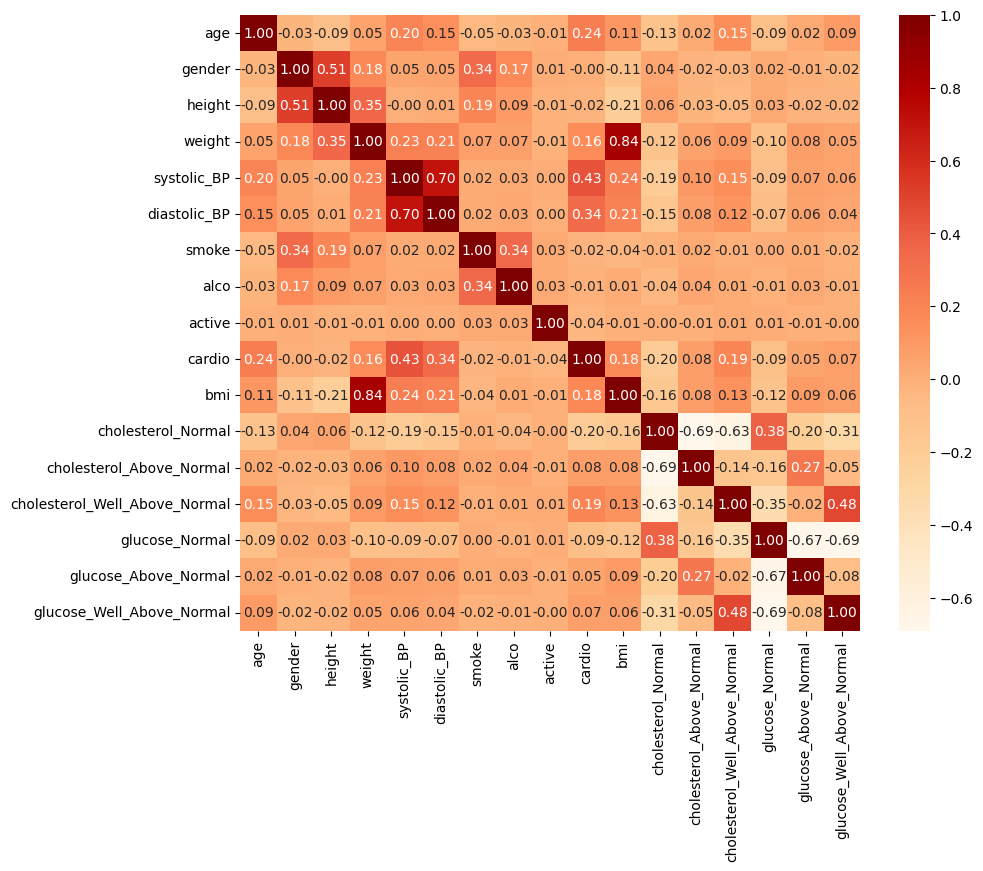

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap((cvd_data.corr()), annot=True, cmap='OrRd', fmt=".2f")

# **Data preperation**

## Data seperation as X and Y

In [ ]:
print(cvd_data.columns)

Index(['age', 'gender', 'height', 'weight', 'systolic_BP', 'diastolic_BP',
       'smoke', 'alco', 'active', 'cardio', 'bmi', 'cholesterol_Normal',
       'cholesterol_Above_Normal', 'cholesterol_Well_Above_Normal',
       'glucose_Normal', 'glucose_Above_Normal', 'glucose_Well_Above_Normal'],
      dtype='object')


In [ ]:
x = cvd_data.drop(["cardio", "height", "weight"], axis=1)
y = cvd_data['cardio']

## Data splitting into testing and training

**Standardising values**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train

,age,gender,systolic_BP,diastolic_BP,smoke,alco,active,bmi,cholesterol_Normal,cholesterol_Above_Normal,cholesterol_Well_Above_Normal,glucose_Normal,glucose_Above_Normal,glucose_Well_Above_Normal
id,,,,,,,,,,,,,,
62458,-0.428273,0,-0.443564,-0.216128,0,0,1,-0.472733,1,0,0,1,0,0
22921,0.757843,0,-0.443564,-0.216128,0,0,0,-0.676402,1,0,0,1,0,0
95543,0.906108,0,-0.443564,-1.522635,0,0,1,-0.287768,1,0,0,1,0,0
82019,1.350901,0,-0.443564,-0.216128,0,0,1,-1.270912,1,0,0,1,0,0
42689,0.016521,0,-0.443564,-0.216128,0,0,0,-0.972168,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74097,0.016521,1,0.959493,1.090379,0,0,1,-0.334454,1,0,0,1,0,0
84755,0.757843,0,0.959493,1.090379,0,0,1,0.101376,1,0,0,1,0,0
68891,-0.576537,1,-1.145092,-0.216128,0,0,1,-0.614325,1,0,0,1,0,0


In [ ]:
x_test

,age,gender,systolic_BP,diastolic_BP,smoke,alco,active,bmi,cholesterol_Normal,cholesterol_Above_Normal,cholesterol_Well_Above_Normal,glucose_Normal,glucose_Above_Normal,glucose_Well_Above_Normal
id,,,,,,,,,,,,,,
60963,1.202636,0,-0.443564,-0.216128,1,0,1,-1.133909,1,0,0,1,0,0
42110,1.350901,1,1.661021,1.090379,0,0,1,1.692278,0,0,1,1,0,0
85727,-0.576537,0,0.959493,1.090379,0,0,1,2.283760,1,0,0,1,0,0
98969,-0.724802,1,0.959493,-0.216128,0,0,0,0.889851,1,0,0,1,0,0
65557,0.164785,0,0.959493,1.090379,0,0,1,0.646717,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29441,0.461314,0,-0.443564,-0.216128,0,0,1,-0.814774,0,1,0,1,0,0
53253,0.313050,1,-0.443564,-0.216128,0,0,1,-0.524210,1,0,0,1,0,0
56023,-1.466124,0,-0.443564,-0.216128,0,0,1,2.419259,1,0,0,1,0,0


# **Model building**

## K Nearest Neighbor

**Find best K value**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
'''
# range of k from 1 to 500
k_values = range(1, 500)

best_accuracy = 0
best_k = 0

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn_classifier.fit(x_train, y_train)

    # Predict the labels for the test set
    y_pred = knn_classifier.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Check if this k value gives better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best k:", best_k)
print("Best accuracy:", best_accuracy)
'''

#Best k: 173
#Best accuracy: 0.7327237417057776

'\n# range of k from 1 to 500\nk_values = range(1, 500) \n\nbest_accuracy = 0\nbest_k = 0\n\nfor k in k_values:\n    knn_classifier = KNeighborsClassifier(n_neighbors=k)\n\n    # Train the classifier\n    knn_classifier.fit(x_train, y_train)\n\n    # Predict the labels for the test set\n    y_pred = knn_classifier.predict(x_test)\n\n    # Calculate accuracy\n    accuracy = accuracy_score(y_test, y_pred)\n\n    # Check if this k value gives better accuracy\n    if accuracy > best_accuracy:\n        best_accuracy = accuracy\n        best_k = k\n\nprint("Best k:", best_k)\nprint("Best accuracy:", best_accuracy)\n'

**Model training with best k value**

In [ ]:
k = 173
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=173)

**Applying model for predicting**

In [ ]:
y_knn_train_prediction = knn.predict(x_train)
y_knn_test_prediction = knn.predict(x_test)

**Evaluate**

In [ ]:
knn_cm = metrics.confusion_matrix(y_test,y_knn_test_prediction)
print(knn_cm)

[[5063 1250]
 [2053 3992]]


In [ ]:
knn_train_mse = mean_squared_error(y_train,y_knn_train_prediction)

knn_test_mse = mean_squared_error(y_test,y_knn_test_prediction)

In [ ]:
knn_precision = precision_score(y_test,y_knn_test_prediction)
knn_recall = recall_score(y_test,y_knn_test_prediction)
knn_f1 = f1_score(y_test,y_knn_test_prediction)

In [ ]:
print("KNN model accuracy(in %):", metrics.accuracy_score(y_test, y_knn_test_prediction)*100)

KNN model accuracy(in %): 73.27237417057776


## Random Forest

**Model Training**

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, random_state = 100)
rf.fit(x_train,y_train)


RandomForestClassifier(n_estimators=1000, random_state=100)

**Applying model for predicting**

In [ ]:
y_rf_train_prediction = rf.predict(x_train)
y_rf_test_prediction = rf.predict(x_test)


**Evaluate**

In [ ]:
rf_cm = metrics.confusion_matrix(y_test,y_rf_test_prediction)
print(rf_cm)

[[4352 1961]
 [1930 4115]]


In [ ]:
rf_train_mse = mean_squared_error(y_train,y_rf_train_prediction)

rf_test_mse = mean_squared_error(y_test,y_rf_test_prediction)

In [ ]:
rf_precision = precision_score(y_test,y_rf_test_prediction)
rf_recall = recall_score(y_test,y_rf_test_prediction)
rf_f1 = f1_score(y_test,y_rf_test_prediction)

In [ ]:
print("Random Forest model accuracy(in %):", metrics.accuracy_score(y_test, y_rf_test_prediction)*100)

Random Forest model accuracy(in %): 68.51432270593946


## Logistic Regression




**Training the model**

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

**Applying model for predicting**

In [ ]:
y_log_reg_train_prediction = log_reg.predict(x_train)
y_log_reg_test_prediction = log_reg.predict(x_test)


**Evaluate**

In [ ]:
log_reg_cm = metrics.confusion_matrix(y_test,y_log_reg_test_prediction)
print(log_reg_cm)

[[5044 1269]
 [2098 3947]]


In [ ]:
log_reg_train_mse = mean_squared_error(y_train,y_log_reg_train_prediction)

log_reg_test_mse = mean_squared_error(y_test,y_log_reg_test_prediction)

In [ ]:
print("Logistic regression model accuracy(in %):", metrics.accuracy_score(y_test, y_log_reg_test_prediction)*100)


Logistic regression model accuracy(in %): 72.75449101796407


In [ ]:
log_reg_precision = precision_score(y_test,y_log_reg_test_prediction)
log_reg_recall = recall_score(y_test,y_log_reg_test_prediction)
log_reg_f1 = f1_score(y_test,y_log_reg_test_prediction)

##Decision Tree

**Training the model**

In [ ]:
tree = tree.DecisionTreeClassifier(max_depth= 5, random_state=100)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=100)

**Applying model for predicting**

In [ ]:
y_tree_train_prediction = tree.predict(x_train)
y_tree_test_prediction = tree.predict(x_test)

**Evaluation**

In [ ]:
tree_cm = metrics.confusion_matrix(y_test,y_tree_test_prediction)
print(tree_cm)

[[5057 1256]
 [2115 3930]]


In [ ]:
tree_train_mse = mean_squared_error(y_train,y_tree_train_prediction)

tree_test_mse = mean_squared_error(y_test,y_tree_test_prediction)

In [ ]:
print("Decision tree model accuracy(in %):", metrics.accuracy_score(y_test, y_tree_test_prediction)*100)

Decision tree model accuracy(in %): 72.72212332092572


In [ ]:
tree_precision = precision_score(y_test,y_tree_test_prediction)
tree_recall = recall_score(y_test,y_tree_test_prediction)
tree_f1 = f1_score(y_test,y_tree_test_prediction)

##Naive Bayes

**Training the model**

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

**Applying model for predicting**

In [ ]:
y_gnb_train_prediction = gnb.predict(x_train)
y_gnb_test_prediction = gnb.predict(x_test)

**Evaluation**

In [ ]:
gnb_cm = metrics.confusion_matrix(y_test,y_gnb_test_prediction)
print(gnb_cm)

[[5010 1303]
 [2598 3447]]


In [ ]:
gnb_train_mse = mean_squared_error(y_train,y_gnb_train_prediction)

gnb_test_mse = mean_squared_error(y_test,y_gnb_test_prediction)

In [ ]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_gnb_test_prediction)*100)

Gaussian Naive Bayes model accuracy(in %): 68.43340346334358


In [ ]:
gnb_precision = precision_score(y_test,y_gnb_test_prediction)
gnb_recall = recall_score(y_test,y_gnb_test_prediction)
gnb_f1 = f1_score(y_test,y_gnb_test_prediction)

# **Tabulate results**

In [ ]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_test_mse, rf_precision, rf_recall, rf_f1]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Testing MSE', "Precision", "Recall", "F1 score"]

log_reg_results = pd.DataFrame(['Logistic Regression', log_reg_train_mse, log_reg_test_mse, log_reg_precision, log_reg_recall, log_reg_f1]).transpose()
log_reg_results.columns = ['Method', 'Training MSE', 'Testing MSE', "Precision", "Recall", "F1 score"]

tree_results = pd.DataFrame(['Decision tree', tree_train_mse, tree_test_mse, tree_precision, tree_recall, tree_f1]).transpose()
tree_results.columns = ['Method', 'Training MSE', 'Testing MSE', "Precision", "Recall", "F1 score"]

gnb_results = pd.DataFrame(['Naive Bayes', gnb_train_mse, gnb_test_mse, gnb_precision, gnb_recall, gnb_f1]).transpose()
gnb_results.columns = ['Method', 'Training MSE', 'Testing MSE', "Precision", "Recall", "F1 score"]

knn_results = pd.DataFrame(['KNN', knn_train_mse, knn_test_mse, knn_precision, knn_recall, knn_f1]).transpose()
knn_results.columns = ['Method', 'Training MSE', 'Testing MSE', "Precision", "Recall", "F1 score"]

cvd_data_models = pd.concat([rf_results, log_reg_results, tree_results, gnb_results, knn_results], axis=0).reset_index(drop=True)
cvd_data_models



,Method,Training MSE,Testing MSE,Precision,Recall,F1 score
0,Random Forest,0.022091,0.314857,0.677255,0.680728,0.678987
1,Logistic Regression,0.276952,0.272455,0.75671,0.652936,0.701003
2,Decision tree,0.273047,0.272779,0.757809,0.650124,0.699849
3,Naive Bayes,0.321458,0.315666,0.725684,0.570223,0.638629
4,KNN,0.271429,0.267276,0.761541,0.66038,0.707362


# Export Model

#Convert into TensorFlow

In [ ]:
weights = log_reg.coef_.flatten()
bias = log_reg.intercept_

tf_log_reg = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid', use_bias=True,
                          kernel_initializer=tf.constant_initializer(weights),
                          bias_initializer=tf.constant_initializer(bias))
])

tf_log_reg.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the TensorFlow
tf_log_reg_test_loss, tf_log_reg_test_accuracy = tf_log_reg.evaluate(x_test, y_test)
print(f"Test Loss: {tf_log_reg_test_loss}, Test Accuracy: {tf_log_reg_test_accuracy}")

387/387 [==============================] - 1s 1ms/step - loss: 0.5583 - accuracy: 0.7275
Test Loss: 0.5582675337791443, Test Accuracy: 0.727544903755188


In [ ]:
# TensorFlow to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(tf_log_reg)
log_reg_tflite = converter.convert()

# Save the TensorFlow Lite model to a file
with open("tf_log_reg.tflite", "wb") as f:
    f.write(log_reg_tflite)
#save label file
labels = ['age', 'gender', 'systolic_BP', 'diastolic_BP',
       'smoke', 'alco', 'active', 'cardio', 'bmi', 'cholesterol_Normal',
       'cholesterol_Above_Normal', 'cholesterol_Well_Above_Normal',
       'glucose_Normal', 'glucose_Above_Normal', 'glucose_Well_Above_Normal']
with open("labels.txt", "w") as f:
  for label in labels:
    f.write(label + "\n")

In [ ]:
#export as a pickle file
with open('log_reg_model.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

In [ ]:
# Load the logistic regression model from the file
with open('log_reg_model.pkl', 'rb') as f:
    loaded_log_reg_model = pickle.load(f)

# Use the loaded model for predictions
predictions = loaded_log_reg_model.predict(x_test)

# Print the predictions
print(predictions)


[0 1 1 ... 0 1 1]
